In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [4]:
data = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender', 'Card Type'], axis=1)
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

CustomerId            0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Point Earned          0
dtype: int64

In [7]:
data.shape

(10000, 13)

In [8]:
threshold_balance = data["Balance"].mean()
threshold_active = data["IsActiveMember"].mean()




def create_purchase_label(row):
    if row['IsActiveMember'] > threshold_active and row['Balance'] > threshold_balance:
        return 1
    else:
        return 0

In [9]:
data['PurchaseLabel'] = data.apply(create_purchase_label, axis=1)

In [10]:
print(data[['Balance', 'IsActiveMember', 'PurchaseLabel']])

        Balance  IsActiveMember  PurchaseLabel
0          0.00               1              0
1      83807.86               1              1
2     159660.80               0              0
3          0.00               0              0
4     125510.82               1              1
...         ...             ...            ...
9995       0.00               0              0
9996   57369.61               1              0
9997       0.00               1              0
9998   75075.31               0              0
9999  130142.79               0              0

[10000 rows x 3 columns]


In [11]:
(data['PurchaseLabel']).sum()

3016

In [12]:
y = data['PurchaseLabel']
x = data.drop(['PurchaseLabel'] , axis=1 )

In [13]:
x.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [14]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: PurchaseLabel, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)


In [16]:
clf = DecisionTreeClassifier(random_state=42)


In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997142857142857


In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2426
           1       1.00      1.00      1.00      1074

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



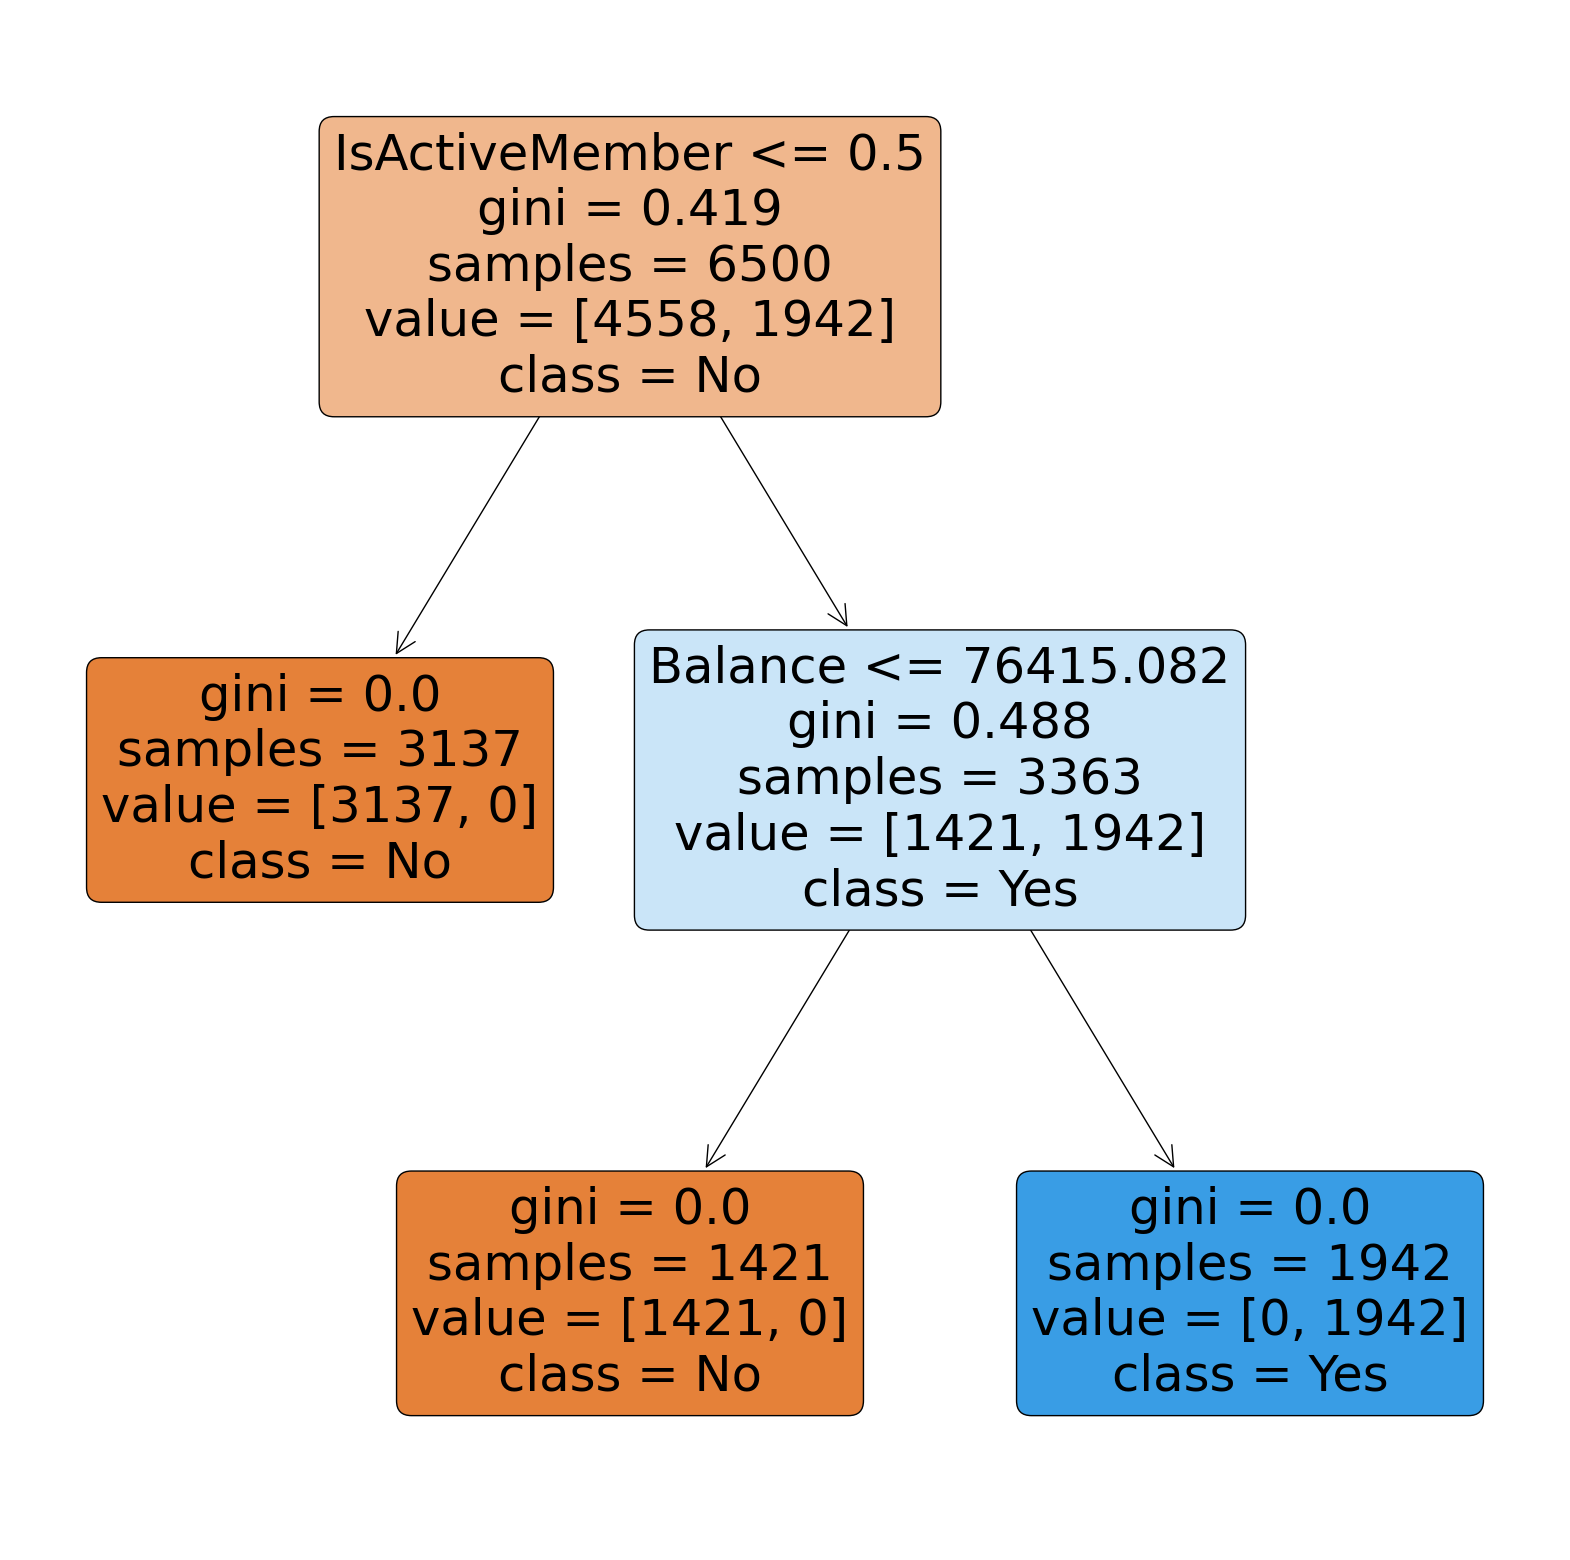

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming clf is your trained decision tree classifier
plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=x.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.savefig('decision_tree.png')
